In [26]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# load dataset
df = sns.load_dataset('titanic')

In [28]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [30]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning**

In [31]:
df.duplicated().sum()

np.int64(107)

In [32]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [33]:
# Check Missing Values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Fill mising vaues with mode
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [36]:
# Fill misining values with mean
df['age'].fillna(df['age'].mean(),inplace=True)

Remove extra feature

In [37]:
# Remove "Embarked" feature
df.drop(['who','adult_male','deck','embarked'],axis=1,inplace=True)

**Feature Engingeering**

In [38]:
# Create new column of total family member
df['Family'] = df['sibsp'] + df['parch']

In [39]:
# binning and create new column of Age_Group
bins = [0,10,20,35,50,85]
labels = ['Children','adults','young','senior','old']
df['Age_Group'] = pd.cut(df['age'],bins=bins,labels=labels)

In [40]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alive,alone,Family,Age_Group
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,no,False,1,young
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,yes,False,1,senior


**Data Analysis**

In [41]:
# Explore the complete data of top highest paying fare
df.sort_values('fare',ascending=False).head(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alive,alone,Family,Age_Group
679,1,1,male,36.0,0,1,512.3292,First,Cherbourg,yes,False,1,senior
737,1,1,male,35.0,0,0,512.3292,First,Cherbourg,yes,True,0,young
258,1,1,female,35.0,0,0,512.3292,First,Cherbourg,yes,True,0,young


In [42]:
# Check Fare according to Age_Group
df.groupby('Age_Group')['fare'].mean().sort_values(ascending=False).head(5)

Age_Group
senior      44.790278
old         43.604819
young       31.238147
adults      30.673627
Children    30.611838
Name: fare, dtype: float64

In [43]:
# Count how many people are survived or nto
df.groupby('sex')['survived'].value_counts()

sex     survived
female  1           217
        0            76
male    0           385
        1           106
Name: count, dtype: int64

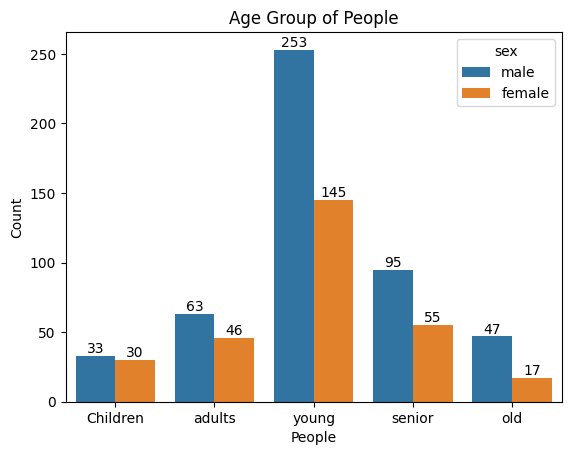

In [44]:
# Counting of People according to thier age_group
ax = sns.countplot(x='Age_Group',hue='sex',data=df)
for container in ax.containers:
  ax.bar_label(container)
plt.title('Age Group of People')
plt.xlabel('People')
plt.ylabel('Count')
plt.show()

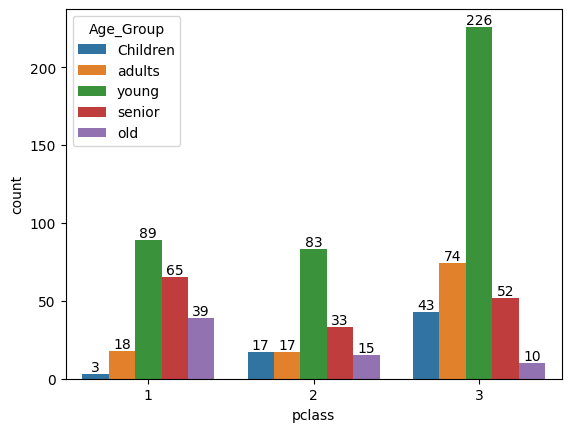

In [45]:
# Counting of people according to Class
count = sns.countplot(x='pclass',hue='Age_Group',data=df)
for numbering in count.containers:
  count.bar_label(numbering)
plt.show()

In [46]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alive,alone,Family,Age_Group
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,no,False,1,young
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,yes,False,1,senior


In [47]:
# Count People less then 200 fare
far = df[df['fare'] <= 200]
far.groupby('sex')['fare'].size()

sex
female    281
male      483
Name: fare, dtype: int64

**Removing Outliers**

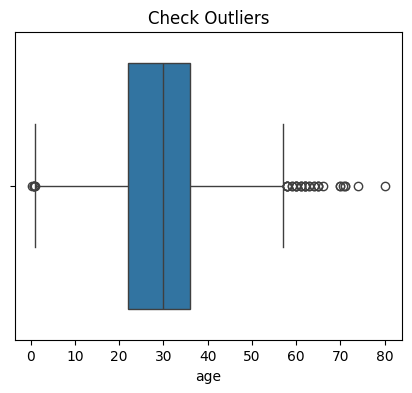

In [48]:
# Check Outliers in Age Column
plt.figure(figsize=(5,4))
sns.boxplot(x=df['age'],data=df)
plt.title('Check Outliers')
plt.show()

In [49]:
# Removing Outliers by IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Filter
df_clean = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)]

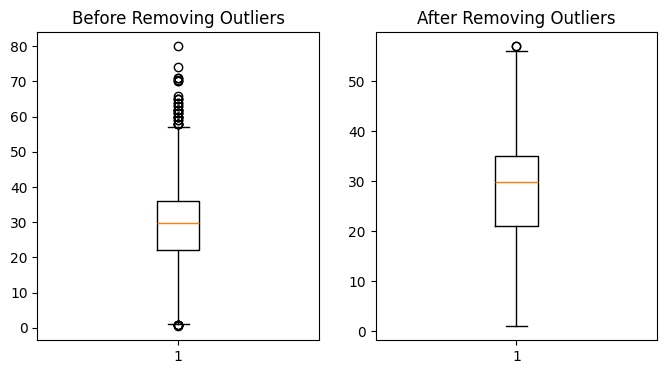

In [50]:
# check outliers remove or not
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['age'])
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['age'])
plt.title("After Removing Outliers")

plt.show()

In [51]:
# Remove Outliers in Fare column
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3-Q1
clean = df[(df['fare']>=Q1-1.5*IQR) & (df['fare'] <=Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'After Removing Outliers')

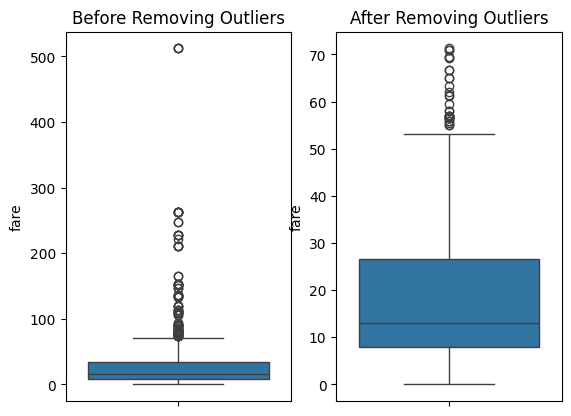

In [52]:
# Check Outliers are remove or not
plt.subplot(1,2,1)
sns.boxplot(df['fare'])
plt.title('Before Removing Outliers')

plt.subplot(1,2,2)
sns.boxplot(clean['fare'])
plt.title('After Removing Outliers')

Encoded these columns for ML Model

In [53]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cat_feature = df.select_dtypes(include=['object','category','bool']).columns
for encoder in cat_feature :
  df[encoder] = oe.fit_transform(df[[encoder]])

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alive,alone,Family,Age_Group
0,0,3,1.0,22.0,1,0,7.2500,2.0,2.0,0.0,0.0,1,4.0
1,1,1,0.0,38.0,1,0,71.2833,0.0,0.0,1.0,0.0,1,3.0
2,1,3,0.0,26.0,0,0,7.9250,2.0,2.0,1.0,1.0,0,4.0
3,1,1,0.0,35.0,1,0,53.1000,0.0,2.0,1.0,0.0,1,4.0
4,0,3,1.0,35.0,0,0,8.0500,2.0,2.0,0.0,1.0,0,4.0


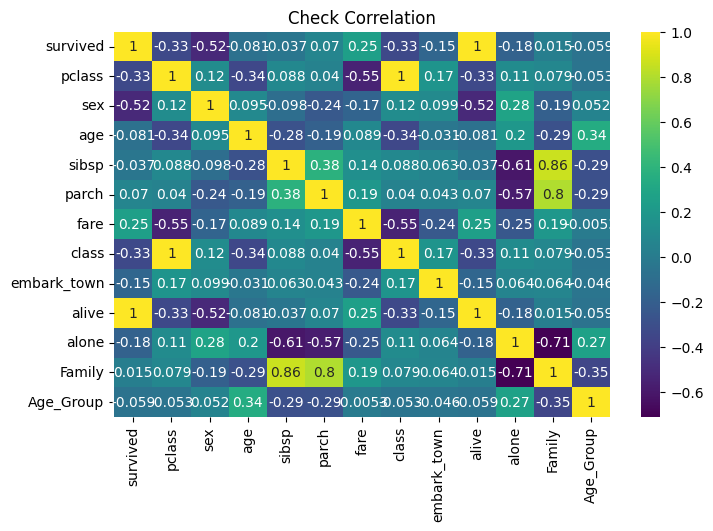

In [55]:
plt.figure(figsize=(8,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="viridis")
plt.title("Check Correlation")
plt.show()

In [57]:
# Drop Highly Correlated feature
df.drop(['alive','pclass','sibsp','parch'],axis=1,inplace=True)

In [58]:
# Import Some Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Put input feature in x and output in y
x = df.drop('survived',axis=1)
y = df['survived']

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [61]:
x

,sex,age,fare,class,embark_town,alone,Family,Age_Group
0,0.772490,-5.737774e-01,-0.526825,0.885158,0.586250,-1.148707,0.040372,0.801519
1,-1.294515,5.928294e-01,0.701587,-1.455362,-1.904915,-1.148707,0.040372,0.068274
2,-1.294515,-2.821257e-01,-0.513876,0.885158,0.586250,0.870544,-0.619034,0.801519
3,-1.294515,3.740906e-01,0.352760,-1.455362,0.586250,-1.148707,0.040372,0.801519
4,0.772490,3.740906e-01,-0.511478,0.885158,0.586250,0.870544,-0.619034,0.801519
...,...,...,...,...,...,...,...,...
779,-1.294515,6.657423e-01,-0.107176,0.885158,-0.659333,-1.148707,2.677995,0.068274
780,-1.294515,-7.925162e-01,-0.090390,-1.455362,0.586250,0.870544,-0.619034,-1.398216
781,-1.294515,-2.590387e-16,-0.216045,0.885158,0.586250,-1.148707,1.359183,0.801519
782,0.772490,-2.821257e-01,-0.090390,-1.455362,-1.904915,0.870544,-0.619034,0.801519


In [62]:
# Set training and testing data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
lg = LogisticRegression( max_iter=250)
lg.fit(x_train1,y_train1)

LogisticRegression(max_iter=250)

In [65]:
# Check Score
lg.score(x_test1,y_test1), lg.score(x_train1,y_train1)

(0.7770700636942676, 0.7862838915470495)

**Fit SVR**

In [66]:
svc = SVC(kernel='linear',degree=4)
svc.fit(x_train1,y_train1)

SVC(degree=4, kernel='linear')

In [67]:
svc.score(x_test1,y_test1), svc.score(x_train1,y_train1)

(0.7707006369426752, 0.7671451355661882)

**Fit RandomForestClassifier**

In [68]:
rf = RandomForestClassifier(n_estimators=150,max_depth=4,min_samples_leaf=3,random_state=42)
rf.fit(x_train1,y_train1)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, n_estimators=150,
                       random_state=42)

In [69]:
rf.score(x_test1,y_test1), rf.score(x_train1,y_train1)

(0.7961783439490446, 0.8293460925039873)

Bagging and Pasting

In [70]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(n_estimators=10, estimator=rf, max_samples=13,random_state=42)
bg.fit(x_train1,y_train1)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=4,
                                                   min_samples_leaf=3,
                                                   n_estimators=150,
                                                   random_state=42),
                  max_samples=13, random_state=42)

In [71]:
bg.score(x_test1, y_test1), bg.score(x_train1, y_train1)

(0.6815286624203821, 0.696969696969697)

Hyperparameter Tunning

In [ ]:
var = ({
    'max_depth':[3,5,7,10],
    'n_estimators': [50,80,110,150],
    'min_samples_leaf': [1,3,5,7],

})

In [ ]:
gd = GridSearchCV(rf,param_grid=var,cv=2)
gd.fit(x_train,y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=4, min_samples_leaf=8,
                                              n_estimators=150,
                                              random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 80, 110, 150]})

In [ ]:
gd.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 150}

Lets join multiple models to increase perfomance

In [73]:
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier([('lg', lg), ('rf', rf), ('svr', svc)])
vt.fit(x_test1,y_test1)

VotingClassifier(estimators=[('lg', LogisticRegression(max_iter=250)),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     min_samples_leaf=3,
                                                     n_estimators=150,
                                                     random_state=42)),
                             ('svr', SVC(degree=4, kernel='linear'))])

In [74]:
vt.score(x_test1,y_test1)*100, vt.score(x_train1,y_train1)*100

(83.43949044585987, 76.87400318979266)

Check Model Perfomance by on Unseen Data

In [75]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cross = cross_val_score(vt, x, y, cv=kf,scoring='accuracy')
print("Score:", cross)
print("Mean:", cross.mean())

Score: [0.77099237 0.82442748 0.75572519 0.77099237 0.79230769 0.78461538]
Mean: 0.783176746917205


Check Model Perfomance by on Unseen Data by Confussion Matrix

In [76]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
conf = confusion_matrix(y_test1, vt.predict(x_test1))
precision = precision_score(y_test1, vt.predict(x_test1))
recal = recall_score(y_test1, vt.predict(x_test1))
f1 = f1_score(y_test1, vt.predict(x_test1))
print("Confusion Matrix")
print(conf)
print('Recall:', recal)
print('Precision:', precision)
print('F1:', f1)

Confusion Matrix
[[80  8]
 [18 51]]
Recall: 0.7391304347826086
Precision: 0.864406779661017
F1: 0.796875


In [77]:
rf.feature_importances_

array([0.39285614, 0.08616767, 0.19287972, 0.16255626, 0.02552581,
       0.02313698, 0.07185604, 0.04502139])

In [95]:
df.head()

,survived,sex,age,fare,class,embark_town,alone,Family,Age_Group
0,0,1.0,22.0,7.2500,2.0,2.0,0.0,1,4.0
1,1,0.0,38.0,71.2833,0.0,0.0,0.0,1,3.0
2,1,0.0,26.0,7.9250,2.0,2.0,1.0,0,4.0
3,1,0.0,35.0,53.1000,0.0,2.0,0.0,1,4.0
4,0,1.0,35.0,8.0500,2.0,2.0,1.0,0,4.0


In [96]:
# Check Prediction of RandomForest Model
rf.predict([[1.0,22.0,7.2500,2.0,2.0,0.0,1,4.0]])

array([0])

Now Create Model with Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
num_feature = ['age','fare','Family']
cat_feature = ['sex','embark_town','Age_Group']

In [ ]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scalar', StandardScaler())
])

In [ ]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [ ]:
preprocessing = ColumnTransformer([
    ('num', num_pipe,num_feature),
    ('cat', cat_pipe,cat_feature)
])

In [ ]:
pipeline = Pipeline([
    ('pipe', preprocessing),
    ('model', RandomForestClassifier())
])

In [ ]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Group,Family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,senior,1


In [ ]:
x = df[['pclass','sex','age','fare','embark_town','Family','Age_Group']]
y = df['survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'Family']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['sex', 'embark_town',
                                                   'Age_Group'])])),
                ('model', RandomForestClassifier())])

In [ ]:
pipeline.score(x_train,y_train)*100, pipeline.score(x_test,y_test)*100

(98.03370786516854, 82.12290502793296)

Check Score of Confusion Matrix, Precission, Recall, F1

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
y_pred = pipeline.predict(x_test)
score = confusion_matrix(y_test,y_pred)
# precision score
score1 = precision_score(y_test,y_pred)
#recall secore
score2 = recall_score(y_test,y_pred)
# F1 score
score3 = f1_score(y_test,y_pred)

In [ ]:
print(f'Confussion: {score}')
print(f'precision_score: {score1}')
print(f'recall_score: {score2}')
print(f'f1_score: {score3}')

Confussion: [[90 15]
 [17 57]]
precision_score: 0.7916666666666666
recall_score: 0.7702702702702703
f1_score: 0.7808219178082192
